In [1]:
import os

import ruamel.yaml as yaml

from dreamerv3.embodied.core.path import Path
import imageio
import numpy as np
import pickle
import os
from PIL import Image
from utils import scan, setup_video, concatenate_images, generate_pairs_weighted, generate_pairs, distance_to_previous_ones

# for the environment initialization
from dreamerv3.embodied.core.config import Config
from dreamerv3.embodied import wrappers
from dreamerv3.train import make_env
from dreamerv3.embodied.core.path import Path

from utils import scan, setup_video, concatenate_images
import matplotlib.pyplot as plt
colors = ["#800020", "#0F52BA", "#228B22", "#4B0082", "#CC5500"]

In [2]:
%cd ..

/lustre/home/csancaktar/Projects/mydream_er


/lustre/home/csancaktar/Projects/mydream_er/dreamer_venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
# MAKE ENVIRONMENT 
configs = yaml.YAML(typ="safe").load((Path("dreamerv3/configs.yaml")).read())
config = Config(configs["defaults"])
config = config.update(configs["p2x_robodesk"])

# config = yaml.YAML(typ="safe").load((Path(os.path.join(job_dir,"config.yaml"))).read())
env = make_env(config)

## Dataset!

In [5]:
dataset_dir = (
    "/fast/csancaktar/sensei_datasets/robodesk/plan2explore_multiple_runs_high_contrast_1"
)


In [6]:
# Load image buffer!
print("Starting to load image data!")
with open(os.path.join(dataset_dir, "data", "images.pickle"), "rb") as data:
    images_array = pickle.load(data)
print("Finished loading image data!")

Starting to load image data!
Finished loading image data!


In [7]:
# # Load image buffer!
# print("Starting to load image data!")
# with open(os.path.join(dataset_dir, "data", "images_rerendered.pickle"), "rb") as data:
#     images_array_loaded = pickle.load(data)
# print("Finished loading image data!")

In [8]:
num_pairs = len(images_array)

In [9]:
gt_annotations = np.load(os.path.join(dataset_dir, "preference", "preferences_gt.npy"))
env_states = np.load(os.path.join(dataset_dir, "data", "env_states.npy"))


In [88]:
test_i = np.random.choice(num_pairs)
# test_i = 0

(-0.5, 223.5, 223.5, -0.5)

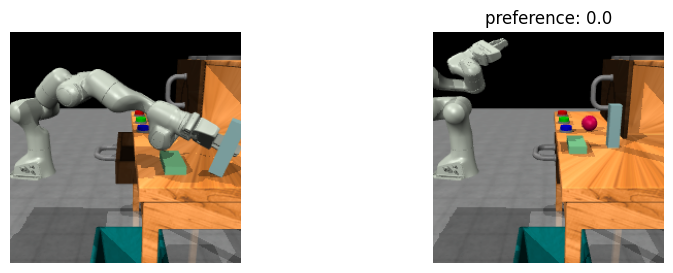

In [178]:
test_i = np.random.choice(num_pairs)

fig, axs = plt.subplots(1, 2, figsize=(10, 3))
plt.title(f"preference: {gt_annotations[test_i]}")
plt.subplot(1, 2,1)
plt.imshow(images_array[test_i, 0, 0, ...])
plt.axis("off")


plt.subplot(1, 2, 2)
plt.imshow(images_array[test_i, 1, 0, ...])

plt.axis("off")


20601.671218617194
20103.215140867393


(-0.5, 223.5, 223.5, -0.5)

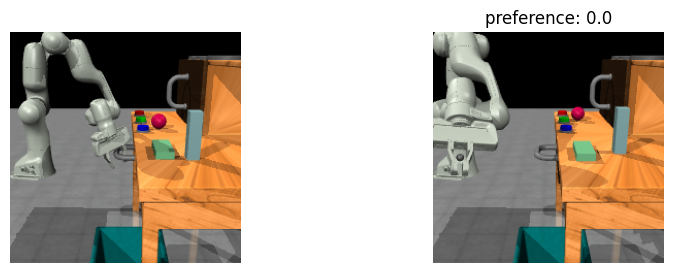

In [125]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
plt.title(f"preference: {gt_annotations[test_i]}")
plt.subplot(1, 2,1)
plt.imshow(images_array_loaded[test_i, 0, 0, ...])
print(np.linalg.norm(images_array_loaded[test_i, 0, 0, ...]-images_array[test_i, 0, 0, ...]))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(images_array_loaded[test_i, 1, 0, ...])
print(np.linalg.norm(images_array_loaded[test_i, 1, 0, ...]-images_array[test_i, 1, 0, ...]))

plt.axis("off")


In [17]:
env_states.shape

(200000, 2, 1, 73)

(-0.5, 223.5, 223.5, -0.5)

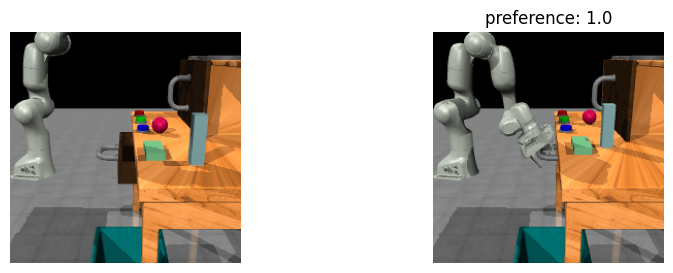

In [19]:
env._env._env.physics.set_state(env_states[test_i, 0,0, ...])
env._env._env.physics.forward()
img_good = env._env._env.render(resize=False)

env._env._env.physics.set_state(env_states[test_i, 1, 0,...])
env._env._env.physics.forward()

img_bad = env._env._env.render(resize=False)
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

plt.title(f"preference: {gt_annotations[test_i]}")
plt.subplot(1, 2,1)
plt.imshow(img_good)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_bad)

plt.axis("off")

In [21]:
width = 224
height = 224

In [23]:
robodesk_image_dataset_highres_rerendered = np.zeros((num_pairs, 2, 1, width, height, 3), dtype=np.uint8)

In [24]:
for pair_i in range(num_pairs):
    env._env._env.physics.set_state(env_states[pair_i, 0,0, ...])
    env._env._env.physics.forward()
    img1 = env._env._env.render(resize=False)
    
    env._env._env.physics.set_state(env_states[pair_i, 1,0, ...])
    env._env._env.physics.forward()
    img2 = env._env._env.render(resize=False)
    
    robodesk_image_dataset_highres_rerendered[pair_i, 0, 0, ...] = img1
    robodesk_image_dataset_highres_rerendered[pair_i, 1, 0, ...] = img2
    
    if pair_i % 10000 == 0:
        print(f"Rendered {pair_i} pairs already!")

Rendered 0 pairs already!
Rendered 10000 pairs already!
Rendered 20000 pairs already!
Rendered 30000 pairs already!
Rendered 40000 pairs already!
Rendered 50000 pairs already!
Rendered 60000 pairs already!
Rendered 70000 pairs already!
Rendered 80000 pairs already!
Rendered 90000 pairs already!
Rendered 100000 pairs already!
Rendered 110000 pairs already!
Rendered 120000 pairs already!
Rendered 130000 pairs already!
Rendered 140000 pairs already!
Rendered 150000 pairs already!
Rendered 160000 pairs already!
Rendered 170000 pairs already!
Rendered 180000 pairs already!
Rendered 190000 pairs already!


In [26]:
robodesk_image_dataset_highres_rerendered[0,0,...]

array([[[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        ...,

        [[ 94,  95,  95],
         [ 94,  94,  94],
         [ 94,  94,  94],
         ...,
         [ 70,  70,  70],
         [ 70,  70,  70],
         [ 70,  70,  70]],

        [[ 97,  97,  97],
         [ 97,  97,  97],
         [ 97,  97,  97],
         ...,
         [ 72,  72,  72],
         [ 72,  72,  72],
         [ 72,  72,  72]],

        [[100, 101, 100],
         [ 99,  99,  99],
         [ 97,  98,  98],
         ...,
         [ 76,  76,  76],
        

In [28]:
dataset_dir

'/fast/csancaktar/sensei_datasets/robodesk/plan2explore_multiple_runs_contrastive'

In [29]:
with open(os.path.join(dataset_dir, "data", f"images_rerendered.pickle"), "wb") as handle:
    pickle.dump(robodesk_image_dataset_highres_rerendered, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [33]:
robodesk_image_dataset_highres_rerendered[pair_i, 1,0, ...]

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[ 94,  95,  95],
        [ 94,  94,  94],
        [ 94,  94,  94],
        ...,
        [ 70,  70,  70],
        [ 70,  70,  70],
        [ 70,  70,  70]],

       [[ 97,  97,  97],
        [ 97,  97,  97],
        [ 97,  97,  97],
        ...,
        [ 72,  72,  72],
        [ 72,  72,  72],
        [ 72,  72,  72]],

       [[100, 101, 100],
        [ 99,  99,  99],
        [ 97,  98,  98],
        ...,
        [ 76,  76,  76],
        [ 74,  74,  74],
        [ 74,  74,  74]]

In [42]:
np.amax(robodesk_image_dataset_highres_rerendered[0, 0,0, ...]-
                    images_array[0, 0,0, ...])

255

In [52]:
np.equal(images_array[1, 1,0, ...],robodesk_image_dataset_highres_rerendered[1, 1,0, ...])

array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       ...,

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,

In [45]:
np.amax(robodesk_image_dataset_highres_rerendered[1, 1,0, ...]-
                    images_array[1, 1,0, ...])

255

In [109]:
max(dist1, dist2)

63337.67735716238

In [118]:
distances = []

for pair_i in range(num_pairs):
    #     is_equal1 = np.equal(robodesk_image_dataset_highres_rerendered[pair_i, 0,0, ...], 
    #                         images_array[pair_i, 0,0, ...]).all()
    dist1 = np.linalg.norm(images_array_loaded[pair_i, 1, 0, ...]-images_array[pair_i, 1, 0, ...])

    #     is_equal2 = np.equal(robodesk_image_dataset_highres_rerendered[pair_i, 1,0, ...], 
    #                         images_array[pair_i, 1,0, ...]).all()
    
    dist2 = np.linalg.norm(images_array_loaded[pair_i, 1, 0, ...]-images_array[pair_i, 1, 0, ...])
    
    distances.append(max(dist1, dist2))
    if dist1 > 43337:
        print(f"incorrect image 1 for pair {pair_i}")
    if dist2 > 43337:
        print(f"incorrect image 2 for pair {pair_i}")

incorrect image 1 for pair 0
incorrect image 2 for pair 0


In [132]:
robodesk_image_dataset_highres_rerendered[pair_i, 0,0, ...]*1./255

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.36862745, 0.37254902, 0.37254902],
        [0.36862745, 0.36862745, 0.36862745],
        [0.36862745, 0

In [135]:
is_equal1 = np.isclose(robodesk_image_dataset_highres_rerendered[pair_i, 0,0, ...]*1./255, 
                    images_array[pair_i, 0,0, ...]*1./255)
dist1 = np.linalg.norm(images_array_loaded[pair_i, 1, 0, ...]*1./255-images_array[pair_i, 1, 0, ...]*1./255)

is_equal2 = np.isclose(robodesk_image_dataset_highres_rerendered[pair_i, 1,0, ...]*1./255, 
                    images_array[pair_i, 1,0, ...]*1./255)


In [140]:
np.linalg.norm(images_array_loaded[200, 1, 0, ...]*1./255-images_array[200, 1, 0, ...]*1./255)


1.825552325136379

In [133]:
distances = []

for pair_i in range(num_pairs):
    is_equal1 = np.isclose(robodesk_image_dataset_highres_rerendered[pair_i, 0,0, ...]*1./255, 
                        images_array[pair_i, 0,0, ...]*1./255).all()
    # dist1 = np.linalg.norm(images_array_loaded[pair_i, 1, 0, ...]-images_array[pair_i, 1, 0, ...])

    is_equal2 = np.equal(robodesk_image_dataset_highres_rerendered[pair_i, 1,0, ...]*1./255, 
                        images_array[pair_i, 1,0, ...]*1./255).all()
    
    # dist2 = np.linalg.norm(images_array_loaded[pair_i, 1, 0, ...]-images_array[pair_i, 1, 0, ...])
    
    # distances.append(max(dist1, dist2))
    if not is_equal1:
        print(f"incorrect image 1 for pair {pair_i}")
    if not is_equal2:
        print(f"incorrect image 2 for pair {pair_i}")

incorrect image 1 for pair 0
incorrect image 2 for pair 0
incorrect image 1 for pair 1
incorrect image 2 for pair 1
incorrect image 1 for pair 2
incorrect image 2 for pair 2
incorrect image 1 for pair 3
incorrect image 2 for pair 3
incorrect image 1 for pair 4
incorrect image 2 for pair 4
incorrect image 1 for pair 5
incorrect image 2 for pair 5
incorrect image 1 for pair 6
incorrect image 2 for pair 6
incorrect image 1 for pair 7
incorrect image 2 for pair 7
incorrect image 1 for pair 8
incorrect image 2 for pair 8
incorrect image 1 for pair 9
incorrect image 2 for pair 9
incorrect image 1 for pair 10
incorrect image 2 for pair 10
incorrect image 1 for pair 11
incorrect image 2 for pair 11
incorrect image 1 for pair 12
incorrect image 2 for pair 12
incorrect image 1 for pair 13
incorrect image 2 for pair 13
incorrect image 1 for pair 14
incorrect image 2 for pair 14
incorrect image 1 for pair 15
incorrect image 2 for pair 15
incorrect image 1 for pair 16
incorrect image 2 for pair 16


incorrect image 1 for pair 148
incorrect image 2 for pair 148
incorrect image 1 for pair 149
incorrect image 2 for pair 149
incorrect image 1 for pair 150
incorrect image 2 for pair 150
incorrect image 1 for pair 151
incorrect image 2 for pair 151
incorrect image 1 for pair 152
incorrect image 2 for pair 152
incorrect image 1 for pair 153
incorrect image 2 for pair 153
incorrect image 1 for pair 154
incorrect image 2 for pair 154
incorrect image 1 for pair 155
incorrect image 2 for pair 155
incorrect image 1 for pair 156
incorrect image 2 for pair 156
incorrect image 1 for pair 157
incorrect image 2 for pair 157
incorrect image 1 for pair 158
incorrect image 2 for pair 158
incorrect image 1 for pair 159
incorrect image 2 for pair 159
incorrect image 1 for pair 160
incorrect image 2 for pair 160
incorrect image 1 for pair 161
incorrect image 2 for pair 161
incorrect image 1 for pair 162
incorrect image 2 for pair 162
incorrect image 1 for pair 163
incorrect image 2 for pair 163
incorrec

incorrect image 1 for pair 306
incorrect image 2 for pair 306
incorrect image 1 for pair 307
incorrect image 2 for pair 307
incorrect image 1 for pair 308
incorrect image 2 for pair 308
incorrect image 1 for pair 309
incorrect image 2 for pair 309
incorrect image 1 for pair 310
incorrect image 2 for pair 310
incorrect image 1 for pair 311
incorrect image 2 for pair 311
incorrect image 1 for pair 312
incorrect image 2 for pair 312
incorrect image 1 for pair 313
incorrect image 2 for pair 313
incorrect image 1 for pair 314
incorrect image 2 for pair 314
incorrect image 1 for pair 315
incorrect image 2 for pair 315
incorrect image 1 for pair 316
incorrect image 2 for pair 316
incorrect image 1 for pair 317
incorrect image 2 for pair 317
incorrect image 1 for pair 318
incorrect image 2 for pair 318
incorrect image 1 for pair 319
incorrect image 2 for pair 319
incorrect image 1 for pair 320
incorrect image 2 for pair 320
incorrect image 1 for pair 321
incorrect image 2 for pair 321
incorrec

incorrect image 1 for pair 461
incorrect image 2 for pair 461
incorrect image 1 for pair 462
incorrect image 2 for pair 462
incorrect image 1 for pair 463
incorrect image 2 for pair 463
incorrect image 1 for pair 464
incorrect image 2 for pair 464
incorrect image 1 for pair 465
incorrect image 2 for pair 465
incorrect image 1 for pair 466
incorrect image 2 for pair 466
incorrect image 1 for pair 467
incorrect image 2 for pair 467
incorrect image 1 for pair 468
incorrect image 2 for pair 468
incorrect image 1 for pair 469
incorrect image 2 for pair 469
incorrect image 1 for pair 470
incorrect image 2 for pair 470
incorrect image 1 for pair 471
incorrect image 2 for pair 471
incorrect image 1 for pair 472
incorrect image 2 for pair 472
incorrect image 1 for pair 473
incorrect image 2 for pair 473
incorrect image 1 for pair 474
incorrect image 2 for pair 474
incorrect image 1 for pair 475
incorrect image 2 for pair 475
incorrect image 1 for pair 476
incorrect image 2 for pair 476
incorrec

incorrect image 1 for pair 618
incorrect image 2 for pair 618
incorrect image 1 for pair 619
incorrect image 2 for pair 619
incorrect image 1 for pair 620
incorrect image 2 for pair 620
incorrect image 1 for pair 621
incorrect image 2 for pair 621
incorrect image 1 for pair 622
incorrect image 2 for pair 622
incorrect image 1 for pair 623
incorrect image 2 for pair 623
incorrect image 1 for pair 624
incorrect image 2 for pair 624
incorrect image 1 for pair 625
incorrect image 2 for pair 625
incorrect image 1 for pair 626
incorrect image 2 for pair 626
incorrect image 1 for pair 627
incorrect image 2 for pair 627
incorrect image 1 for pair 628
incorrect image 2 for pair 628
incorrect image 1 for pair 629
incorrect image 2 for pair 629
incorrect image 1 for pair 630
incorrect image 2 for pair 630
incorrect image 1 for pair 631
incorrect image 2 for pair 631
incorrect image 1 for pair 632
incorrect image 2 for pair 632
incorrect image 1 for pair 633
incorrect image 2 for pair 633
incorrec

incorrect image 1 for pair 775
incorrect image 2 for pair 775
incorrect image 1 for pair 776
incorrect image 2 for pair 776
incorrect image 1 for pair 777
incorrect image 2 for pair 777
incorrect image 1 for pair 778
incorrect image 2 for pair 778
incorrect image 1 for pair 779
incorrect image 2 for pair 779
incorrect image 1 for pair 780
incorrect image 2 for pair 780
incorrect image 1 for pair 781
incorrect image 2 for pair 781
incorrect image 1 for pair 782
incorrect image 2 for pair 782
incorrect image 1 for pair 783
incorrect image 2 for pair 783
incorrect image 1 for pair 784
incorrect image 2 for pair 784
incorrect image 1 for pair 785
incorrect image 2 for pair 785
incorrect image 1 for pair 786
incorrect image 2 for pair 786
incorrect image 1 for pair 787
incorrect image 2 for pair 787
incorrect image 1 for pair 788
incorrect image 2 for pair 788
incorrect image 1 for pair 789
incorrect image 2 for pair 789
incorrect image 1 for pair 790
incorrect image 2 for pair 790
incorrec

incorrect image 1 for pair 932
incorrect image 2 for pair 932
incorrect image 1 for pair 933
incorrect image 2 for pair 933
incorrect image 1 for pair 934
incorrect image 2 for pair 934
incorrect image 1 for pair 935
incorrect image 2 for pair 935
incorrect image 1 for pair 936
incorrect image 2 for pair 936
incorrect image 1 for pair 937
incorrect image 2 for pair 937
incorrect image 1 for pair 938
incorrect image 2 for pair 938
incorrect image 1 for pair 939
incorrect image 2 for pair 939
incorrect image 1 for pair 940
incorrect image 2 for pair 940
incorrect image 1 for pair 941
incorrect image 2 for pair 941
incorrect image 1 for pair 942
incorrect image 2 for pair 942
incorrect image 1 for pair 943
incorrect image 2 for pair 943
incorrect image 1 for pair 944
incorrect image 2 for pair 944
incorrect image 1 for pair 945
incorrect image 2 for pair 945
incorrect image 1 for pair 946
incorrect image 2 for pair 946
incorrect image 1 for pair 947
incorrect image 2 for pair 947
incorrec

incorrect image 1 for pair 1087
incorrect image 2 for pair 1087
incorrect image 1 for pair 1088
incorrect image 2 for pair 1088
incorrect image 1 for pair 1089
incorrect image 2 for pair 1089
incorrect image 1 for pair 1090
incorrect image 2 for pair 1090
incorrect image 1 for pair 1091
incorrect image 2 for pair 1091
incorrect image 1 for pair 1092
incorrect image 2 for pair 1092
incorrect image 1 for pair 1093
incorrect image 2 for pair 1093
incorrect image 1 for pair 1094
incorrect image 2 for pair 1094
incorrect image 1 for pair 1095
incorrect image 2 for pair 1095
incorrect image 1 for pair 1096
incorrect image 2 for pair 1096
incorrect image 1 for pair 1097
incorrect image 2 for pair 1097
incorrect image 1 for pair 1098
incorrect image 2 for pair 1098
incorrect image 1 for pair 1099
incorrect image 2 for pair 1099
incorrect image 1 for pair 1100
incorrect image 2 for pair 1100
incorrect image 1 for pair 1101
incorrect image 2 for pair 1101
incorrect image 1 for pair 1102
incorrec

incorrect image 1 for pair 1242
incorrect image 2 for pair 1242
incorrect image 1 for pair 1243
incorrect image 2 for pair 1243
incorrect image 1 for pair 1244
incorrect image 2 for pair 1244
incorrect image 1 for pair 1245
incorrect image 2 for pair 1245
incorrect image 1 for pair 1246
incorrect image 2 for pair 1246
incorrect image 1 for pair 1247
incorrect image 2 for pair 1247
incorrect image 1 for pair 1248
incorrect image 2 for pair 1248
incorrect image 1 for pair 1249
incorrect image 2 for pair 1249
incorrect image 1 for pair 1250
incorrect image 2 for pair 1250
incorrect image 1 for pair 1251
incorrect image 2 for pair 1251
incorrect image 1 for pair 1252
incorrect image 2 for pair 1252
incorrect image 1 for pair 1253
incorrect image 2 for pair 1253
incorrect image 1 for pair 1254
incorrect image 2 for pair 1254
incorrect image 1 for pair 1255
incorrect image 2 for pair 1255
incorrect image 1 for pair 1256
incorrect image 2 for pair 1256
incorrect image 1 for pair 1257
incorrec

incorrect image 1 for pair 1399
incorrect image 2 for pair 1399
incorrect image 1 for pair 1400
incorrect image 2 for pair 1400
incorrect image 1 for pair 1401
incorrect image 2 for pair 1401
incorrect image 1 for pair 1402
incorrect image 2 for pair 1402
incorrect image 1 for pair 1403
incorrect image 2 for pair 1403
incorrect image 1 for pair 1404
incorrect image 2 for pair 1404
incorrect image 1 for pair 1405
incorrect image 2 for pair 1405
incorrect image 1 for pair 1406
incorrect image 2 for pair 1406
incorrect image 1 for pair 1407
incorrect image 2 for pair 1407
incorrect image 1 for pair 1408
incorrect image 2 for pair 1408
incorrect image 1 for pair 1409
incorrect image 2 for pair 1409
incorrect image 1 for pair 1410
incorrect image 2 for pair 1410
incorrect image 1 for pair 1411
incorrect image 2 for pair 1411
incorrect image 1 for pair 1412
incorrect image 2 for pair 1412
incorrect image 1 for pair 1413
incorrect image 2 for pair 1413
incorrect image 1 for pair 1414
incorrec

incorrect image 1 for pair 1556
incorrect image 2 for pair 1556
incorrect image 1 for pair 1557
incorrect image 2 for pair 1557
incorrect image 1 for pair 1558
incorrect image 2 for pair 1558
incorrect image 1 for pair 1559
incorrect image 2 for pair 1559
incorrect image 1 for pair 1560
incorrect image 2 for pair 1560
incorrect image 1 for pair 1561
incorrect image 2 for pair 1561
incorrect image 1 for pair 1562
incorrect image 2 for pair 1562
incorrect image 1 for pair 1563
incorrect image 2 for pair 1563
incorrect image 1 for pair 1564
incorrect image 2 for pair 1564
incorrect image 1 for pair 1565
incorrect image 2 for pair 1565
incorrect image 1 for pair 1566
incorrect image 2 for pair 1566
incorrect image 1 for pair 1567
incorrect image 2 for pair 1567
incorrect image 1 for pair 1568
incorrect image 2 for pair 1568
incorrect image 1 for pair 1569
incorrect image 2 for pair 1569
incorrect image 1 for pair 1570
incorrect image 2 for pair 1570
incorrect image 1 for pair 1571
incorrec

incorrect image 1 for pair 1713
incorrect image 2 for pair 1713
incorrect image 1 for pair 1714
incorrect image 2 for pair 1714
incorrect image 1 for pair 1715
incorrect image 2 for pair 1715
incorrect image 1 for pair 1716
incorrect image 2 for pair 1716
incorrect image 1 for pair 1717
incorrect image 2 for pair 1717
incorrect image 1 for pair 1718
incorrect image 2 for pair 1718
incorrect image 1 for pair 1719
incorrect image 2 for pair 1719
incorrect image 1 for pair 1720
incorrect image 2 for pair 1720
incorrect image 1 for pair 1721
incorrect image 2 for pair 1721
incorrect image 1 for pair 1722
incorrect image 2 for pair 1722
incorrect image 1 for pair 1723
incorrect image 2 for pair 1723
incorrect image 1 for pair 1724
incorrect image 2 for pair 1724
incorrect image 1 for pair 1725
incorrect image 2 for pair 1725
incorrect image 1 for pair 1726
incorrect image 2 for pair 1726
incorrect image 1 for pair 1727
incorrect image 2 for pair 1727
incorrect image 1 for pair 1728
incorrec

incorrect image 1 for pair 1868
incorrect image 2 for pair 1868
incorrect image 1 for pair 1869
incorrect image 2 for pair 1869
incorrect image 1 for pair 1870
incorrect image 2 for pair 1870
incorrect image 1 for pair 1871
incorrect image 2 for pair 1871
incorrect image 1 for pair 1872
incorrect image 2 for pair 1872
incorrect image 1 for pair 1873
incorrect image 2 for pair 1873
incorrect image 1 for pair 1874
incorrect image 2 for pair 1874
incorrect image 1 for pair 1875
incorrect image 2 for pair 1875
incorrect image 1 for pair 1876
incorrect image 2 for pair 1876
incorrect image 1 for pair 1877
incorrect image 2 for pair 1877
incorrect image 1 for pair 1878
incorrect image 2 for pair 1878
incorrect image 1 for pair 1879
incorrect image 2 for pair 1879
incorrect image 1 for pair 1880
incorrect image 2 for pair 1880
incorrect image 1 for pair 1881
incorrect image 2 for pair 1881
incorrect image 1 for pair 1882
incorrect image 2 for pair 1882
incorrect image 1 for pair 1883
incorrec

incorrect image 1 for pair 2024
incorrect image 2 for pair 2024
incorrect image 1 for pair 2025
incorrect image 2 for pair 2025
incorrect image 1 for pair 2026
incorrect image 2 for pair 2026
incorrect image 1 for pair 2027
incorrect image 2 for pair 2027
incorrect image 1 for pair 2028
incorrect image 2 for pair 2028
incorrect image 1 for pair 2029
incorrect image 2 for pair 2029
incorrect image 1 for pair 2030
incorrect image 2 for pair 2030
incorrect image 1 for pair 2031
incorrect image 2 for pair 2031
incorrect image 1 for pair 2032
incorrect image 2 for pair 2032
incorrect image 1 for pair 2033
incorrect image 2 for pair 2033
incorrect image 1 for pair 2034
incorrect image 2 for pair 2034
incorrect image 1 for pair 2035
incorrect image 2 for pair 2035
incorrect image 1 for pair 2036
incorrect image 2 for pair 2036
incorrect image 1 for pair 2037
incorrect image 2 for pair 2037
incorrect image 1 for pair 2038
incorrect image 2 for pair 2038
incorrect image 1 for pair 2039
incorrec

incorrect image 1 for pair 2182
incorrect image 2 for pair 2182
incorrect image 1 for pair 2183
incorrect image 2 for pair 2183
incorrect image 1 for pair 2184
incorrect image 2 for pair 2184
incorrect image 1 for pair 2185
incorrect image 2 for pair 2185
incorrect image 1 for pair 2186
incorrect image 2 for pair 2186
incorrect image 1 for pair 2187
incorrect image 2 for pair 2187
incorrect image 1 for pair 2188
incorrect image 2 for pair 2188
incorrect image 1 for pair 2189
incorrect image 2 for pair 2189
incorrect image 1 for pair 2190
incorrect image 2 for pair 2190
incorrect image 1 for pair 2191
incorrect image 2 for pair 2191
incorrect image 1 for pair 2192
incorrect image 2 for pair 2192
incorrect image 1 for pair 2193
incorrect image 2 for pair 2193
incorrect image 1 for pair 2194
incorrect image 2 for pair 2194
incorrect image 1 for pair 2195
incorrect image 2 for pair 2195
incorrect image 1 for pair 2196
incorrect image 2 for pair 2196
incorrect image 1 for pair 2197
incorrec

incorrect image 1 for pair 2336
incorrect image 2 for pair 2336
incorrect image 1 for pair 2337
incorrect image 2 for pair 2337
incorrect image 1 for pair 2338
incorrect image 2 for pair 2338
incorrect image 1 for pair 2339
incorrect image 2 for pair 2339
incorrect image 1 for pair 2340
incorrect image 2 for pair 2340
incorrect image 1 for pair 2341
incorrect image 2 for pair 2341
incorrect image 1 for pair 2342
incorrect image 2 for pair 2342
incorrect image 1 for pair 2343
incorrect image 2 for pair 2343
incorrect image 1 for pair 2344
incorrect image 2 for pair 2344
incorrect image 1 for pair 2345
incorrect image 2 for pair 2345
incorrect image 1 for pair 2346
incorrect image 2 for pair 2346
incorrect image 1 for pair 2347
incorrect image 2 for pair 2347
incorrect image 1 for pair 2348
incorrect image 2 for pair 2348
incorrect image 1 for pair 2349
incorrect image 2 for pair 2349
incorrect image 1 for pair 2350
incorrect image 2 for pair 2350
incorrect image 1 for pair 2351
incorrec

incorrect image 1 for pair 2491
incorrect image 2 for pair 2491
incorrect image 1 for pair 2492
incorrect image 2 for pair 2492
incorrect image 1 for pair 2493
incorrect image 2 for pair 2493
incorrect image 1 for pair 2494
incorrect image 2 for pair 2494
incorrect image 1 for pair 2495
incorrect image 2 for pair 2495
incorrect image 1 for pair 2496
incorrect image 2 for pair 2496
incorrect image 1 for pair 2497
incorrect image 2 for pair 2497
incorrect image 1 for pair 2498
incorrect image 2 for pair 2498
incorrect image 1 for pair 2499
incorrect image 2 for pair 2499
incorrect image 1 for pair 2500
incorrect image 2 for pair 2500
incorrect image 1 for pair 2501
incorrect image 2 for pair 2501
incorrect image 1 for pair 2502
incorrect image 2 for pair 2502
incorrect image 1 for pair 2503
incorrect image 2 for pair 2503
incorrect image 1 for pair 2504
incorrect image 2 for pair 2504
incorrect image 1 for pair 2505
incorrect image 2 for pair 2505
incorrect image 1 for pair 2506
incorrec

incorrect image 1 for pair 2649
incorrect image 2 for pair 2649
incorrect image 1 for pair 2650
incorrect image 2 for pair 2650
incorrect image 1 for pair 2651
incorrect image 2 for pair 2651
incorrect image 1 for pair 2652
incorrect image 2 for pair 2652
incorrect image 1 for pair 2653
incorrect image 2 for pair 2653
incorrect image 1 for pair 2654
incorrect image 2 for pair 2654
incorrect image 1 for pair 2655
incorrect image 2 for pair 2655
incorrect image 1 for pair 2656
incorrect image 2 for pair 2656
incorrect image 1 for pair 2657
incorrect image 2 for pair 2657
incorrect image 1 for pair 2658
incorrect image 2 for pair 2658
incorrect image 1 for pair 2659
incorrect image 2 for pair 2659
incorrect image 1 for pair 2660
incorrect image 2 for pair 2660
incorrect image 1 for pair 2661
incorrect image 2 for pair 2661
incorrect image 1 for pair 2662
incorrect image 2 for pair 2662
incorrect image 1 for pair 2663
incorrect image 2 for pair 2663
incorrect image 1 for pair 2664
incorrec

incorrect image 1 for pair 2808
incorrect image 2 for pair 2808
incorrect image 1 for pair 2809
incorrect image 2 for pair 2809
incorrect image 1 for pair 2810
incorrect image 2 for pair 2810
incorrect image 1 for pair 2811
incorrect image 2 for pair 2811
incorrect image 1 for pair 2812
incorrect image 2 for pair 2812
incorrect image 1 for pair 2813
incorrect image 2 for pair 2813
incorrect image 1 for pair 2814
incorrect image 2 for pair 2814
incorrect image 1 for pair 2815
incorrect image 2 for pair 2815
incorrect image 1 for pair 2816
incorrect image 2 for pair 2816
incorrect image 1 for pair 2817
incorrect image 2 for pair 2817
incorrect image 1 for pair 2818
incorrect image 2 for pair 2818
incorrect image 1 for pair 2819
incorrect image 2 for pair 2819
incorrect image 1 for pair 2820
incorrect image 2 for pair 2820
incorrect image 1 for pair 2821
incorrect image 2 for pair 2821
incorrect image 1 for pair 2822
incorrect image 2 for pair 2822
incorrect image 1 for pair 2823
incorrec

incorrect image 1 for pair 2965
incorrect image 2 for pair 2965
incorrect image 1 for pair 2966
incorrect image 2 for pair 2966
incorrect image 1 for pair 2967
incorrect image 2 for pair 2967
incorrect image 1 for pair 2968
incorrect image 2 for pair 2968
incorrect image 1 for pair 2969
incorrect image 2 for pair 2969
incorrect image 1 for pair 2970
incorrect image 2 for pair 2970
incorrect image 1 for pair 2971
incorrect image 2 for pair 2971
incorrect image 1 for pair 2972
incorrect image 2 for pair 2972
incorrect image 1 for pair 2973
incorrect image 2 for pair 2973
incorrect image 1 for pair 2974
incorrect image 2 for pair 2974
incorrect image 1 for pair 2975
incorrect image 2 for pair 2975
incorrect image 1 for pair 2976
incorrect image 2 for pair 2976
incorrect image 1 for pair 2977
incorrect image 2 for pair 2977
incorrect image 1 for pair 2978
incorrect image 2 for pair 2978
incorrect image 1 for pair 2979
incorrect image 2 for pair 2979
incorrect image 1 for pair 2980
incorrec

incorrect image 1 for pair 3101
incorrect image 2 for pair 3101
incorrect image 1 for pair 3102
incorrect image 2 for pair 3102
incorrect image 1 for pair 3103
incorrect image 2 for pair 3103
incorrect image 1 for pair 3104
incorrect image 2 for pair 3104
incorrect image 1 for pair 3105
incorrect image 2 for pair 3105
incorrect image 1 for pair 3106
incorrect image 2 for pair 3106
incorrect image 1 for pair 3107
incorrect image 2 for pair 3107
incorrect image 1 for pair 3108
incorrect image 2 for pair 3108
incorrect image 1 for pair 3109
incorrect image 2 for pair 3109
incorrect image 1 for pair 3110
incorrect image 2 for pair 3110
incorrect image 1 for pair 3111
incorrect image 2 for pair 3111
incorrect image 1 for pair 3112
incorrect image 2 for pair 3112
incorrect image 1 for pair 3113
incorrect image 2 for pair 3113
incorrect image 1 for pair 3114
incorrect image 2 for pair 3114
incorrect image 1 for pair 3115
incorrect image 2 for pair 3115
incorrect image 1 for pair 3116
incorrec

incorrect image 1 for pair 3258
incorrect image 2 for pair 3258
incorrect image 1 for pair 3259
incorrect image 2 for pair 3259
incorrect image 1 for pair 3260
incorrect image 2 for pair 3260
incorrect image 1 for pair 3261
incorrect image 2 for pair 3261
incorrect image 1 for pair 3262
incorrect image 2 for pair 3262
incorrect image 1 for pair 3263
incorrect image 2 for pair 3263
incorrect image 1 for pair 3264
incorrect image 2 for pair 3264
incorrect image 1 for pair 3265
incorrect image 2 for pair 3265
incorrect image 1 for pair 3266
incorrect image 2 for pair 3266
incorrect image 1 for pair 3267
incorrect image 2 for pair 3267
incorrect image 1 for pair 3268
incorrect image 2 for pair 3268
incorrect image 1 for pair 3269
incorrect image 2 for pair 3269
incorrect image 1 for pair 3270
incorrect image 2 for pair 3270
incorrect image 1 for pair 3271
incorrect image 2 for pair 3271
incorrect image 1 for pair 3272
incorrect image 2 for pair 3272
incorrect image 1 for pair 3273
incorrec

incorrect image 1 for pair 3413
incorrect image 2 for pair 3413
incorrect image 1 for pair 3414
incorrect image 2 for pair 3414
incorrect image 1 for pair 3415
incorrect image 2 for pair 3415
incorrect image 1 for pair 3416
incorrect image 2 for pair 3416
incorrect image 1 for pair 3417
incorrect image 2 for pair 3417
incorrect image 1 for pair 3418
incorrect image 2 for pair 3418
incorrect image 1 for pair 3419
incorrect image 2 for pair 3419
incorrect image 1 for pair 3420
incorrect image 2 for pair 3420
incorrect image 1 for pair 3421
incorrect image 2 for pair 3421
incorrect image 1 for pair 3422
incorrect image 2 for pair 3422
incorrect image 1 for pair 3423
incorrect image 2 for pair 3423
incorrect image 1 for pair 3424
incorrect image 2 for pair 3424
incorrect image 1 for pair 3425
incorrect image 2 for pair 3425
incorrect image 1 for pair 3426
incorrect image 2 for pair 3426
incorrect image 1 for pair 3427
incorrect image 2 for pair 3427
incorrect image 1 for pair 3428
incorrec

incorrect image 1 for pair 3573
incorrect image 2 for pair 3573
incorrect image 1 for pair 3574
incorrect image 2 for pair 3574
incorrect image 1 for pair 3575
incorrect image 2 for pair 3575
incorrect image 1 for pair 3576
incorrect image 2 for pair 3576
incorrect image 1 for pair 3577
incorrect image 2 for pair 3577
incorrect image 1 for pair 3578
incorrect image 2 for pair 3578
incorrect image 1 for pair 3579
incorrect image 2 for pair 3579
incorrect image 1 for pair 3580
incorrect image 2 for pair 3580
incorrect image 1 for pair 3581
incorrect image 2 for pair 3581
incorrect image 1 for pair 3582
incorrect image 2 for pair 3582
incorrect image 1 for pair 3583
incorrect image 2 for pair 3583
incorrect image 1 for pair 3584
incorrect image 2 for pair 3584
incorrect image 1 for pair 3585
incorrect image 2 for pair 3585
incorrect image 1 for pair 3586
incorrect image 2 for pair 3586
incorrect image 1 for pair 3587
incorrect image 2 for pair 3587
incorrect image 1 for pair 3588
incorrec

incorrect image 1 for pair 3729
incorrect image 2 for pair 3729
incorrect image 1 for pair 3730
incorrect image 2 for pair 3730
incorrect image 1 for pair 3731
incorrect image 2 for pair 3731
incorrect image 1 for pair 3732
incorrect image 2 for pair 3732
incorrect image 1 for pair 3733
incorrect image 2 for pair 3733
incorrect image 1 for pair 3734
incorrect image 2 for pair 3734
incorrect image 1 for pair 3735
incorrect image 2 for pair 3735
incorrect image 1 for pair 3736
incorrect image 2 for pair 3736
incorrect image 1 for pair 3737
incorrect image 2 for pair 3737
incorrect image 1 for pair 3738
incorrect image 2 for pair 3738
incorrect image 1 for pair 3739
incorrect image 2 for pair 3739
incorrect image 1 for pair 3740
incorrect image 2 for pair 3740
incorrect image 1 for pair 3741
incorrect image 2 for pair 3741
incorrect image 1 for pair 3742
incorrect image 2 for pair 3742
incorrect image 1 for pair 3743
incorrect image 2 for pair 3743
incorrect image 1 for pair 3744
incorrec

incorrect image 1 for pair 3886
incorrect image 2 for pair 3886
incorrect image 1 for pair 3887
incorrect image 2 for pair 3887
incorrect image 1 for pair 3888
incorrect image 2 for pair 3888
incorrect image 1 for pair 3889
incorrect image 2 for pair 3889
incorrect image 1 for pair 3890
incorrect image 2 for pair 3890
incorrect image 1 for pair 3891
incorrect image 2 for pair 3891
incorrect image 1 for pair 3892
incorrect image 2 for pair 3892
incorrect image 1 for pair 3893
incorrect image 2 for pair 3893
incorrect image 1 for pair 3894
incorrect image 2 for pair 3894
incorrect image 1 for pair 3895
incorrect image 2 for pair 3895
incorrect image 1 for pair 3896
incorrect image 2 for pair 3896
incorrect image 1 for pair 3897
incorrect image 2 for pair 3897
incorrect image 1 for pair 3898
incorrect image 2 for pair 3898
incorrect image 1 for pair 3899
incorrect image 2 for pair 3899
incorrect image 1 for pair 3900
incorrect image 2 for pair 3900
incorrect image 1 for pair 3901
incorrec

incorrect image 1 for pair 4044
incorrect image 2 for pair 4044
incorrect image 1 for pair 4045
incorrect image 2 for pair 4045
incorrect image 1 for pair 4046
incorrect image 2 for pair 4046
incorrect image 1 for pair 4047
incorrect image 2 for pair 4047
incorrect image 1 for pair 4048
incorrect image 2 for pair 4048
incorrect image 1 for pair 4049
incorrect image 2 for pair 4049
incorrect image 1 for pair 4050
incorrect image 2 for pair 4050
incorrect image 1 for pair 4051
incorrect image 2 for pair 4051
incorrect image 1 for pair 4052
incorrect image 2 for pair 4052
incorrect image 1 for pair 4053
incorrect image 2 for pair 4053
incorrect image 1 for pair 4054
incorrect image 2 for pair 4054
incorrect image 1 for pair 4055
incorrect image 2 for pair 4055
incorrect image 1 for pair 4056
incorrect image 2 for pair 4056
incorrect image 1 for pair 4057
incorrect image 2 for pair 4057
incorrect image 1 for pair 4058
incorrect image 2 for pair 4058
incorrect image 1 for pair 4059
incorrec

incorrect image 1 for pair 4199
incorrect image 2 for pair 4199
incorrect image 1 for pair 4200
incorrect image 2 for pair 4200
incorrect image 1 for pair 4201
incorrect image 2 for pair 4201
incorrect image 1 for pair 4202
incorrect image 2 for pair 4202



KeyboardInterrupt



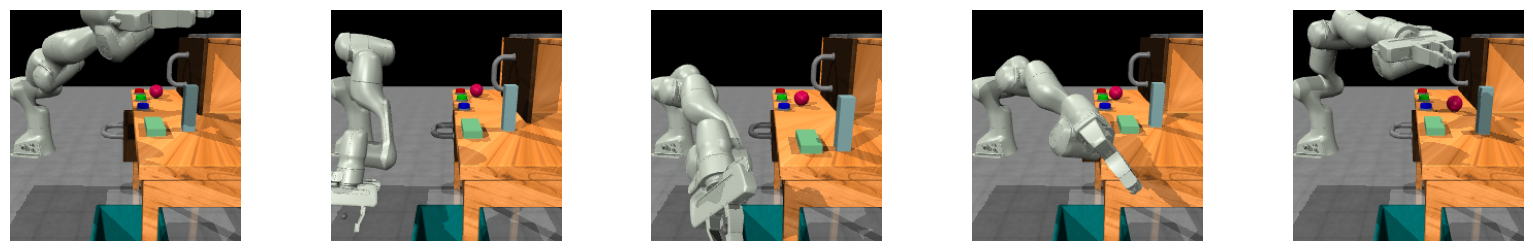

In [114]:
fig, axs = plt.subplots(1, 5, figsize=(20, 3))

rand_i = np.random.choice(np.sum(very_bad_inds), 5, replace=False)
ind_list = np.where(very_bad_inds)[0][rand_i]
global_t = 0
for i in ind_list:
    env._env._env.physics.set_state(env_state_array_buffer[i])
    env._env._env.physics.forward()
    robodesk_img1 = env._env._env.render(resize=False)
    plt.subplot(1, 5, global_t + 1)
    plt.imshow(robodesk_img1)
    plt.axis("off")
    global_t += 1

In [290]:
np.save(os.path.join(motif_dataset_dir, "preference", "preferences_gt.npy"),preferences)

np.save(os.path.join(motif_dataset_dir, "data", "pair_indices.npy"), pair_indices_dataset)

with open(os.path.join(motif_dataset_dir, "data", f"images.pickle"), "wb") as handle:
    pickle.dump(robodesk_image_dataset_highres, handle, protocol=pickle.HIGHEST_PROTOCOL)

np.save(os.path.join(motif_dataset_dir, "data", "env_states.npy"), env_state_dataset)